In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd # The cornerstone (library) of our Data Analysis job with Python.
import numpy as np # The numeric library that serves as the foundation of all calculations in Python.
import seaborn as sns # A statistical visualization tool built on top of matplotlib. 

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib # The foundational library for visualizations. Other libraries we'll use will be built on top of matplotlib.
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Now we need to read in the data, will be using M1 MacBook
#df means data frame
df = pd.read_csv(r'~/Documents/Python/movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Missing Data, for loop
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [5]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<AxesSubplot:>

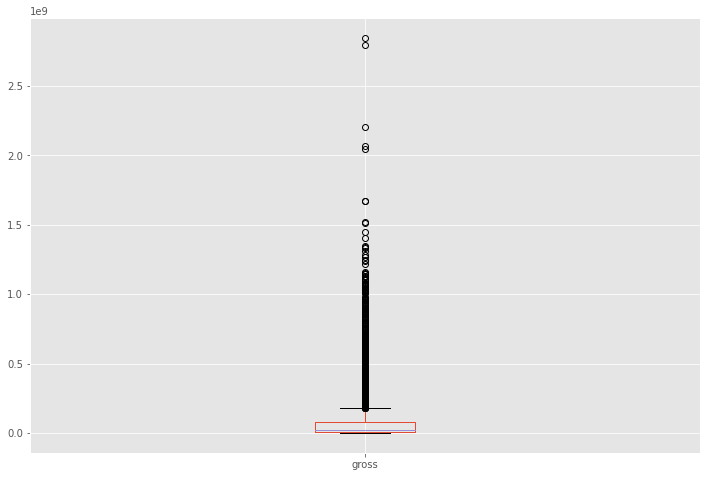

In [23]:

# Are there any Outliers?

df.boxplot(column=['gross'])

In [26]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1705
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1492
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1771
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1492
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1543


In [13]:
# We can order our values by Gross Amount
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"December 18, 2009 (United States)"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,"April 26, 2019 (United States)"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"December 19, 1997 (United States)"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"December 18, 2015 (United States)"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,"April 27, 2018 (United States)"


In [14]:
# In order to see all rows
pd.set_option('display.max_rows', None)

In [15]:
df['company'].drop_duplicates().sort_values(ascending=False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980 (United States)"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980 (United States)"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980 (United States)"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980 (United States)"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980 (United States)"


<AxesSubplot:xlabel='gross', ylabel='budget'>

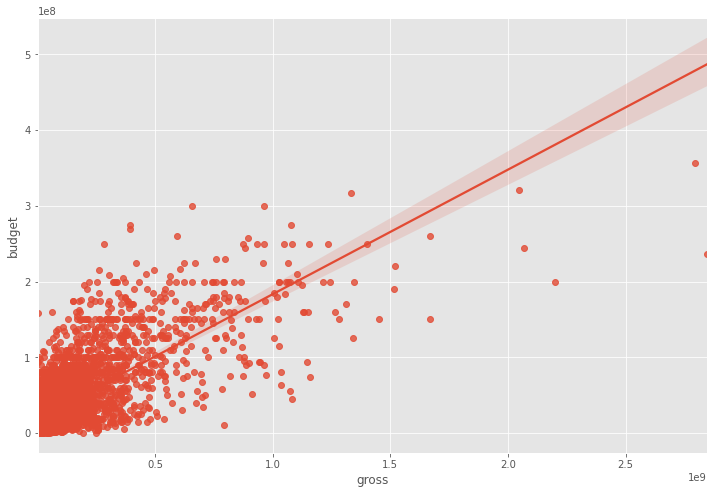

In [27]:
sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

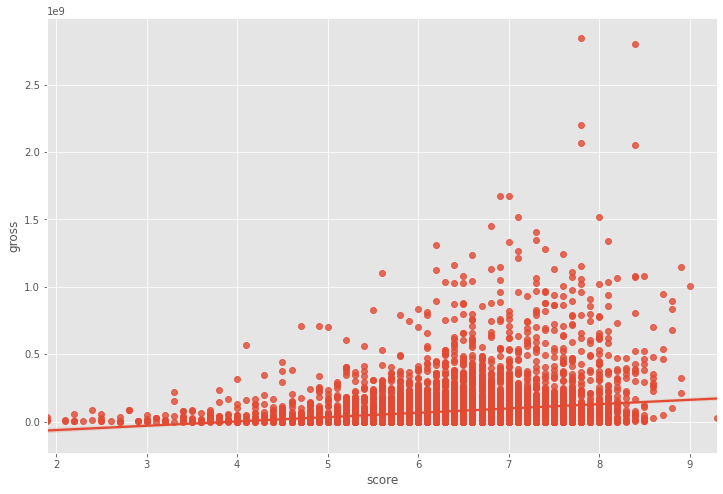

In [28]:
sns.regplot(x="score", y="gross", data=df)

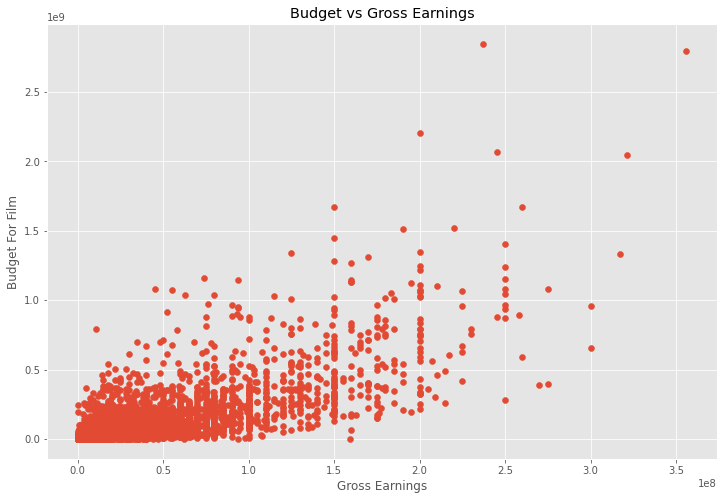

In [17]:
# Scatter plot with budget vs gross, not very easy to see 

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

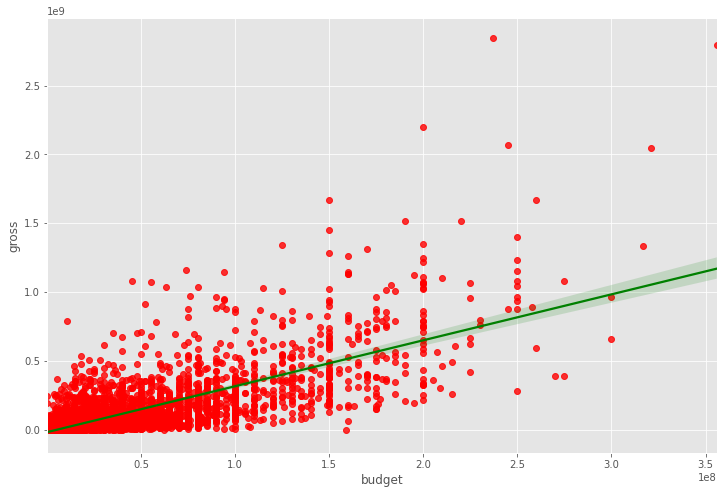

In [70]:
# To faciliate visual, we can color line green, Positive Correlation
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"Green"})

In [31]:
# Three types of methods, important to which to use of specific use case
df.corr(method = 'pearson') #pearson, kendall, spearman

#pearson, most widely used correlation statistic to measure the degree of the relationship between linearly related variables.

#kendall, a non-parametric test that measures the strength of dependence between two variables.

#spearman, non-parametric test that is used to measure the degree of association between two variables.

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


In [29]:
df.corr(method ='kendall')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.009373,0.011615,0.007957,-0.007514,0.007769,0.005842,0.005961,0.006196,0.004366,-0.005985,0.014819,-0.000495,0.006715,0.010191
rating,-0.009373,1.000000,0.100890,-0.000516,0.023896,0.019863,0.017004,0.007735,0.001079,0.013431,0.022408,-0.198859,-0.134830,-0.061833,0.055823
genre,0.011615,0.100890,1.000000,-0.059866,0.021527,0.049721,-0.149969,-0.012338,0.002779,-0.003664,-0.056763,-0.278966,-0.210893,-0.065025,-0.015251
year,0.007957,-0.000516,-0.059866,1.000000,0.000399,0.067652,0.331465,-0.013311,-0.005800,-0.018181,-0.068822,0.224120,0.200618,-0.002283,0.097184
released,-0.007514,0.023896,0.021527,0.000399,1.000000,0.027612,-0.008681,-0.000762,-0.001510,0.010395,-0.020635,-0.003801,-0.028470,-0.004634,0.004405
score,0.007769,0.019863,0.049721,0.067652,0.027612,1.000000,0.300115,0.010082,0.013060,0.000163,-0.172293,-0.000566,0.086046,-0.004454,0.283611
votes,0.005842,0.017004,-0.149969,0.331465,-0.008681,0.300115,1.000000,0.012942,0.009177,-0.009153,0.056417,0.353702,0.548899,0.125344,0.198240
director,0.005961,0.007735,-0.012338,-0.013311,-0.000762,0.010082,0.012942,1.000000,0.227312,0.026451,0.009532,-0.006020,0.010520,0.002917,0.010240
writer,0.006196,0.001079,0.002779,-0.005800,-0.001510,0.013060,0.009177,0.227312,1.000000,0.018635,0.008789,-0.015664,0.000855,0.003640,-0.008642
star,0.004366,0.013431,-0.003664,-0.018181,0.010395,0.000163,-0.009153,0.026451,0.018635,1.000000,-0.016154,-0.009778,-0.008320,0.006753,0.005899


In [30]:
df.corr(method ='spearman')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.012197,0.015940,0.011978,-0.011298,0.011505,0.008739,0.008912,0.009201,0.006639,-0.007715,0.022180,-0.000634,0.010211,0.015295
rating,-0.012197,1.000000,0.123670,-0.000120,0.031884,0.024234,0.022363,0.010232,0.001379,0.017564,0.025221,-0.254885,-0.173251,-0.079008,0.072508
genre,0.015940,0.123670,1.000000,-0.081261,0.029685,0.067659,-0.204214,-0.016710,0.003902,-0.004860,-0.067968,-0.376346,-0.288896,-0.089637,-0.023203
year,0.011978,-0.000120,-0.081261,1.000000,-0.000334,0.099045,0.469829,-0.019843,-0.008666,-0.026876,-0.088509,0.317336,0.293084,-0.004300,0.142977
released,-0.011298,0.031884,0.029685,-0.000334,1.000000,0.041079,-0.014314,-0.001206,-0.002330,0.015694,-0.026772,-0.006394,-0.045193,-0.007243,0.006738
score,0.011505,0.024234,0.067659,0.099045,0.041079,1.000000,0.428138,0.014691,0.019175,0.000372,-0.218330,-0.001403,0.126116,-0.006822,0.399857
votes,0.008739,0.022363,-0.204214,0.469829,-0.014314,0.428138,1.000000,0.019429,0.013890,-0.013697,0.073396,0.502466,0.742050,0.185955,0.290159
director,0.008912,0.010232,-0.016710,-0.019843,-0.001206,0.014691,0.019429,1.000000,0.299032,0.039391,0.012424,-0.008635,0.015700,0.004255,0.015192
writer,0.009201,0.001379,0.003902,-0.008666,-0.002330,0.019175,0.013890,0.299032,1.000000,0.027368,0.011371,-0.023175,0.001202,0.005256,-0.012915
star,0.006639,0.017564,-0.004860,-0.026876,0.015694,0.000372,-0.013697,0.039391,0.027368,1.000000,-0.020899,-0.014599,-0.012207,0.010087,0.008661


In [32]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.154269,0.036367,0.965761,0.959855,-0.046733,0.287776,0.745905,0.805801,0.731509,0.144960,0.277488,0.947324,0.591834,0.048955,0.959855
rating,0.154269,1.000000,-0.091898,0.166475,0.156544,0.012393,0.104436,0.098462,0.115812,0.107458,0.020296,0.185162,0.161506,-0.011014,0.037179,0.156544
genre,0.036367,-0.091898,1.000000,0.037184,0.035980,-0.002437,0.023285,0.047288,0.033933,0.038918,-0.015182,0.073008,0.038616,0.009203,0.001462,0.035980
year,0.965761,0.166475,0.037184,1.000000,0.994020,-0.044981,0.312401,0.770497,0.825351,0.756341,0.142259,0.300621,0.980873,0.601720,0.050647,0.994020
released,0.959855,0.156544,0.035980,0.994020,1.000000,-0.045722,0.300098,0.771360,0.820646,0.755408,0.150028,0.285251,0.975591,0.607607,0.047289,1.000000
score,-0.046733,0.012393,-0.002437,-0.044981,-0.045722,1.000000,-0.009749,-0.022687,-0.035031,-0.009853,0.023278,-0.012642,-0.047041,-0.028285,0.026436,-0.045722
votes,0.287776,0.104436,0.023285,0.312401,0.300098,-0.009749,1.000000,0.192220,0.224093,0.179619,-0.045899,0.398519,0.286180,0.009102,0.106024,0.300098
director,0.745905,0.098462,0.047288,0.770497,0.771360,-0.022687,0.192220,1.000000,0.748875,0.682358,0.157134,0.106617,0.750911,0.552420,-0.011070,0.771360
writer,0.805801,0.115812,0.033933,0.825351,0.820646,-0.035031,0.224093,0.748875,1.000000,0.676284,0.158919,0.187041,0.806158,0.547126,0.032396,0.820646
star,0.731509,0.107458,0.038918,0.756341,0.755408,-0.009853,0.179619,0.682358,0.676284,1.000000,0.184619,0.108016,0.735612,0.527363,0.035494,0.755408


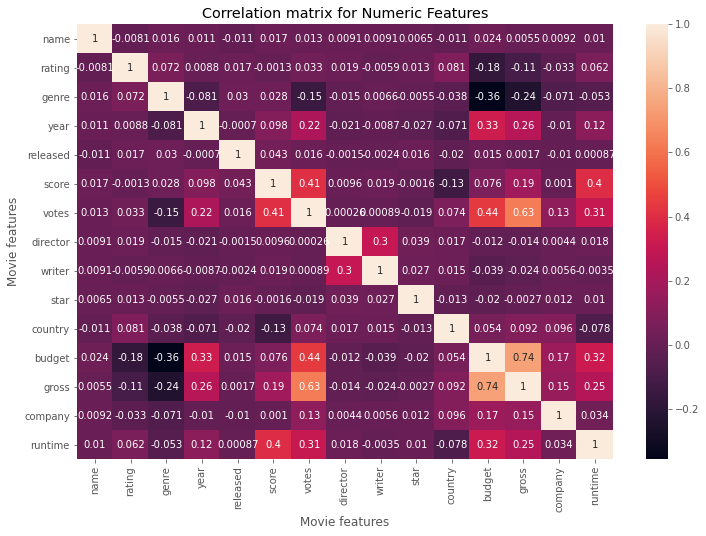

In [40]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

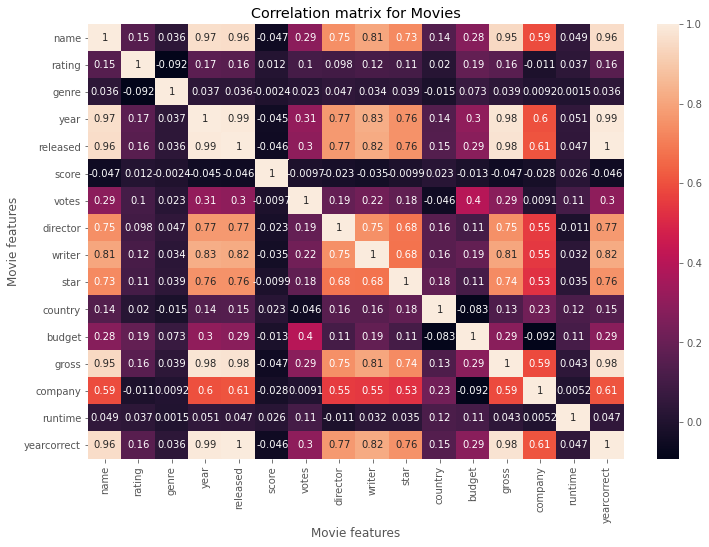

In [33]:
# High correlation between Budget and Gross

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [35]:
# We can now take a look at the ones that have a high correlation (> 0.5)

correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.154269
             genre          0.036367
             year           0.965761
             released       0.959855
             score         -0.046733
             votes          0.287776
             director       0.745905
             writer         0.805801
             star           0.731509
             country        0.144960
             budget         0.277488
             gross          0.947324
             company        0.591834
             runtime        0.048955
             yearcorrect    0.959855
rating       name           0.154269
             rating         1.000000
             genre         -0.091898
             year           0.166475
             released       0.156544
             score          0.012393
             votes          0.104436
             director       0.098462
             writer         0.115812
             star           0.107458
             country        0.020296
 

In [36]:

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

company      budget        -0.092495
budget       company       -0.092495
genre        rating        -0.091898
rating       genre         -0.091898
budget       country       -0.082974
country      budget        -0.082974
score        gross         -0.047041
gross        score         -0.047041
score        name          -0.046733
name         score         -0.046733
votes        country       -0.045899
country      votes         -0.045899
released     score         -0.045722
yearcorrect  score         -0.045722
score        released      -0.045722
             yearcorrect   -0.045722
             year          -0.044981
year         score         -0.044981
writer       score         -0.035031
score        writer        -0.035031
             company       -0.028285
company      score         -0.028285
director     score         -0.022687
score        director      -0.022687
genre        country       -0.015182
country      genre         -0.015182
budget       score         -0.012642
s

In [37]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star         company        0.527363
company      star           0.527363
             writer         0.547126
writer       company        0.547126
company      director       0.552420
director     company        0.552420
company      gross          0.587727
gross        company        0.587727
name         company        0.591834
company      name           0.591834
year         company        0.601720
company      year           0.601720
             yearcorrect    0.607607
yearcorrect  company        0.607607
released     company        0.607607
company      released       0.607607
writer       star           0.676284
star         writer         0.676284
             director       0.682358
director     star           0.682358
star         name           0.731509
name         star           0.731509
gross        star           0.735612
star         gross          0.735612
name         director       0.745905
director     name           0.745905
             writer         0.748875
w

In [3]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [4]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [42]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
2319    56491421806
2281    52514188890
731     43008941346
1812    40493607415
2253    40257053857
2316    36327887792
1713    19883797684
1606    15065592411
887     11873612858
2232    11795832638
889     11635441081
1637     9230230105
2147     8373718838
1856     7886344526
1109     7443502667
Name: gross, dtype: int64

In [20]:
df_numerical = df

for col_name in df_numerical.columns:
    if(df_numerical[col_name].dtype == 'object'):
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes
        
df_numerical.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1705
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1492
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1771
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1492
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1543


In [103]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


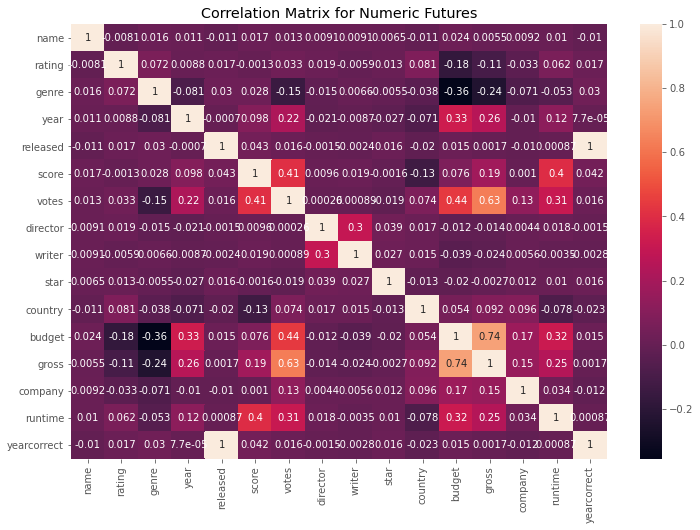

In [21]:
correlation_matrix = df_numerical.corr(method='pearson')
plt.title('Correlation Matrix for Numeric Futures')

plt.xlabel('Movie Futures')

plt.ylabel('Movie Futures')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [102]:
df_numerical.corr().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868


In [98]:
correlation_mat = df_numerical.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs #Quicker way to see corr between Gross vs Budget, and Gross vs Votes, both High correlantion 

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [99]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [101]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#Conclusion: Votes and Budget have high correlation with Gross Earnings 

#Company (brand/name) has low correlation with Gross Earnings